# Subset Simulation for Correlated Normal Random Variables with a Linear Performance Function

Michael D. Shields  
Associate Professor  
Department of Civil & Systems Engineering  
Johns Hopkins University  

Date: 2/20/2020

# Problem Statement
This example runs subset simulation for a linear performance function having a specified reliability index $\beta$ and standard normal random variables with specified correlation using the affine invariate ensemble "stretch" sampler and the conventional Modified Metropolis Hastings algorithm. For more details, refer to:
- Shields, M.D. and Giovanis, D.G. and Sundar, V.S. "Subset Simulation for problems with strongly non-Gaussian, highly anisotropic, and degenerate distributions," Computers and Structures. (In Review)

## 1. Import the necessary libraries

In [1]:
from UQpy.reliability import SubsetSimulation
import matplotlib.pyplot as plt
from UQpy.sampling import ModifiedMetropolisHastings, Stretch
from UQpy.sampling.input_data import MmhInput, StretchInput
import time
import numpy as np
from UQpy.distributions import MultivariateNormal
from UQpy.RunModel import RunModel
import scipy.stats as stats

## 2. Define the reliability index, correlation, dimension, algorithm, and the number of trials to run.

In [2]:
# Specified Reliability Index
beta = 4

# Specified Correlation
rho = 0.5

# Dimension
dim = 2

# Specify the number of trials to run
ntrials = 1

# Define the correlation matrix
C = np.ones((dim, dim)) * rho
np.fill_diagonal(C, 1)
print(C)

# Print information related to the true probability of failure
e, v = np.linalg.eig(np.asarray(C))
print(e)
print(v)
beff = np.sqrt(np.max(e)) * beta
print(beff)
pf_true = stats.norm.cdf(-beta)
print(pf_true)

[[1.  0.5]
 [0.5 1. ]]
[1.5 0.5]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
4.898979485566356
3.167124183311986e-05


## 3. Execute subset simulation with the MMH algorithm

In [3]:
pf = np.zeros((ntrials, 1))
cov1 = np.zeros((ntrials, 1))
cov2 = np.zeros((ntrials, 1))
for i in range(ntrials):
    model = RunModel(model_script='pfn.py', model_object_name="RunPythonModel", ntasks=1, b_eff=beff, d=dim)
    dist = MultivariateNormal(mean=np.zeros((dim)), cov=C)
    x = dist.rvs(nsamples=1000, random_state=349857)
    input=MmhInput(dimension=dim, log_pdf_target=dist.log_pdf, chains_number=100, random_state=342985)

    x_ss = SubsetSimulation(mcmc_input=input, runmodel_object=model, samples_init=x, conditional_probability=0.1,
                            samples_number_per_subset=1000 )
    pf[i] = x_ss.pf
    cov1[i] = x_ss.cov1
    cov2[i] = x_ss.cov2

## 4. Plot samples from each conditional level and print the subset simulation results

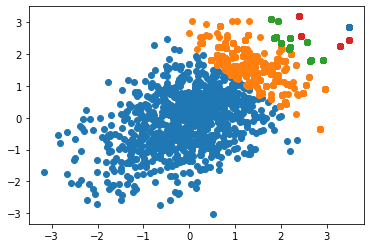

Mean Pf: 0.0
Mean beta:  21.273453560965322
CoV:  [0.]
CoV beta:  [0.]
CoV log10:  [0.]
0.35944401511222857
5.151577564203027


In [4]:
for i in range(len(x_ss.g)):
    plt.scatter(x_ss.samples[i][:, 0], x_ss.samples[i][:, 1], marker='o')
plt.show()

print('Mean Pf:', np.mean(pf))
pf[pf == 0] = 1e-100
print('Mean beta: ', -np.mean(stats.norm.ppf(pf)))
print('CoV: ', stats.variation(pf))
print('CoV beta: ', np.absolute(stats.variation(stats.norm.ppf(pf))))
print('CoV log10: ', np.absolute(stats.variation(np.log10(pf))))
print(np.mean(cov1))
print(np.mean(cov2))

## 5. Plot histograms of the failure probabilities and the reliability indices from subset simulation

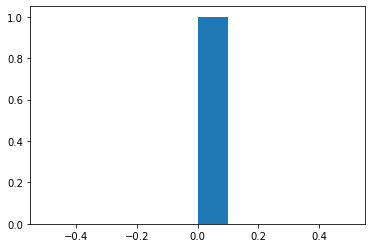

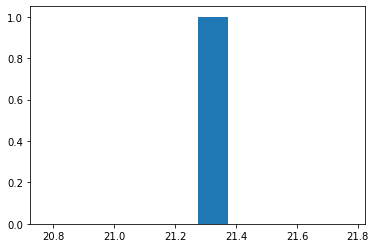

In [5]:
plt.hist(pf)
plt.show()

beta = -stats.norm.ppf(pf)
plt.hist(beta)
plt.show()

## 6. Execute subset simulation with the Stretch algorithm

In [6]:
pf = np.zeros((ntrials, 1))
cov1 = np.zeros((ntrials, 1))
cov2 = np.zeros((ntrials, 1))
for i in range(ntrials):
    model = RunModel(model_script='pfn.py', model_object_name="RunPythonModel", ntasks=1, b_eff=beff, d=dim)
    dist = MultivariateNormal(mean=np.zeros((dim)), cov=C)
    x = dist.rvs(nsamples=1000, random_state=349857)

    input = StretchInput(dimension=dim, log_pdf_target=dist.log_pdf, chains_number=100, random_state=342985)

    x_ss = SubsetSimulation(mcmc_input=input, runmodel_object=model, samples_init=x, conditional_probability=0.1,
                            samples_number_per_subset=1000)
    pf[i] = x_ss.pf
    cov1[i] = x_ss.cov1
    cov2[i] = x_ss.cov2

## 7. Plot samples from each conditional level and print the subset simulation results

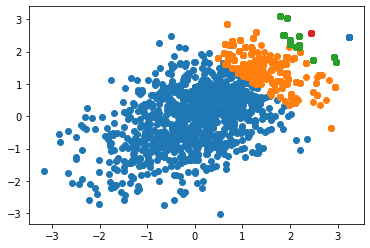

Mean Pf: 0.0
Mean beta:  21.273453560965322
CoV:  [0.]
CoV beta:  [0.]
CoV log10:  [0.]
0.41255302689472534
4.428519797855714


In [7]:
for i in range(len(x_ss.g)):
    plt.scatter(x_ss.samples[i][:, 0], x_ss.samples[i][:, 1], marker='o')
plt.show()

print('Mean Pf:', np.mean(pf))
pf[pf == 0] = 1e-100
print('Mean beta: ', -np.mean(stats.norm.ppf(pf)))
print('CoV: ', stats.variation(pf))
print('CoV beta: ', np.absolute(stats.variation(stats.norm.ppf(pf))))
print('CoV log10: ', np.absolute(stats.variation(np.log10(pf))))
print(np.mean(cov1))
print(np.mean(cov2))

## 8. Plot histograms of the failure probabilities and the reliability indices from subset simulation

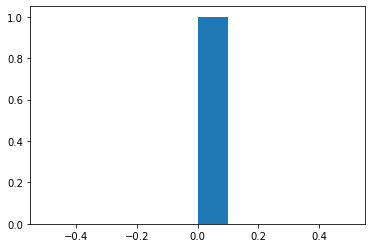

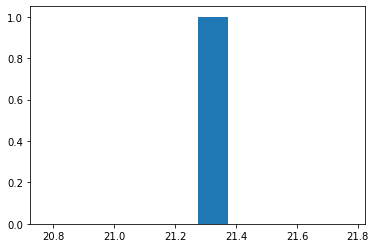

In [8]:
plt.hist(pf)
plt.show()

beta = -stats.norm.ppf(pf)
plt.hist(beta)
plt.show()